# Gaussian pyramids

**Representation in which image information at different scales is explicitly available (i.e. does not need to be computed when needed)** 

A  pyramid is made by smoothing the image with an appropriate smoothing filter and then subsampling the smoothed image, usually by a factor of 2 along each coordinate direction. The resulting image is then subjected to the same procedure, and the cycle is repeated multiple times. Each cycle of this process results in a smaller image with increased smoothing, but with decreased spatial sampling density (that is, decreased image resolution). If illustrated graphically, the entire multi-scale representation will look like a pyramid, with the original image on the bottom and each cycle's resulting smaller image stacked one atop the other.
[Pyramid illustration](https://en.wikipedia.org/wiki/Pyramid_(image_processing)#/media/File:Image_pyramid.svg)

Tutorial on Gaussian Pyramids
https://www.cs.toronto.edu/~mangas/teaching/320/slides/CSC320L10.pdf

# 1/ Reduce

Blur, then sub-sample using the separable filter [1 4 6 4 1]/16.

In [1]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
from skimage import data
import random

In [2]:
def display_images(img1, img2):
    plt.figure(figsize=(15, 15))
    plt.subplot(1, 2, 1)
    plt.imshow(img1, cmap="gray")
    plt.axis("off")
    plt.subplot(1, 2, 2)
    plt.imshow(img2, cmap="gray")
    plt.axis("off")
    plt.plot()

(512, 512)


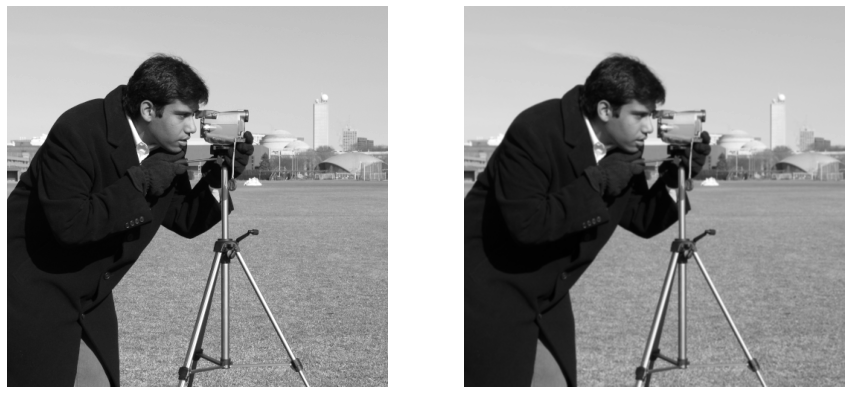

In [3]:
image = data.camera()
image_blurred = cv2.GaussianBlur(image,(3,3),0)

print(image.shape)

display_images(image,image_blurred)

(512, 512)
(256, 256)
(128, 128)


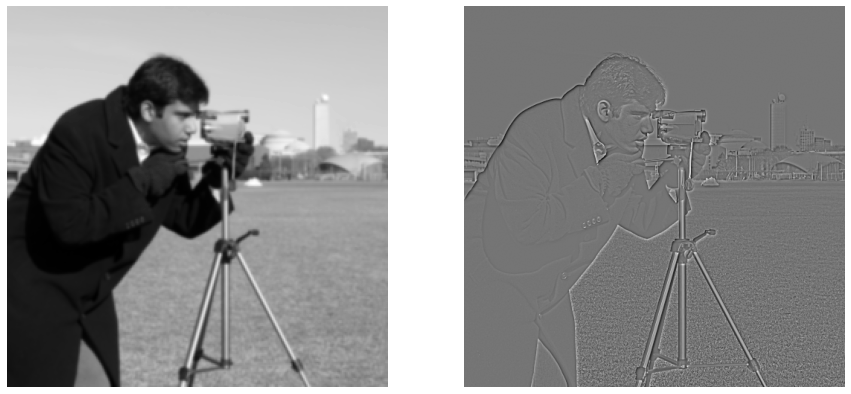

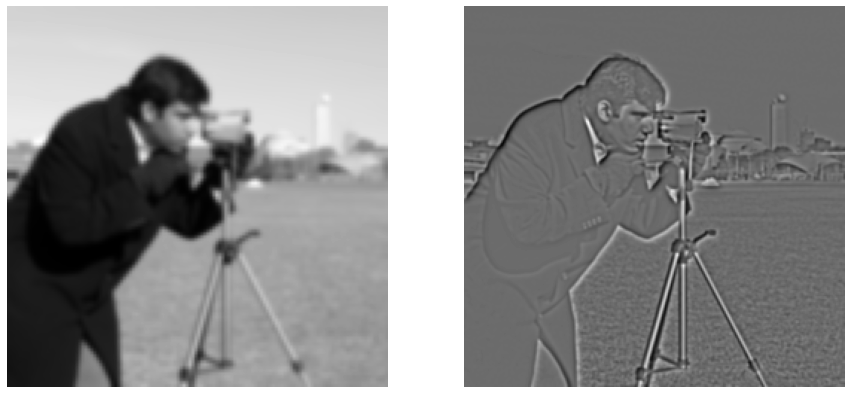

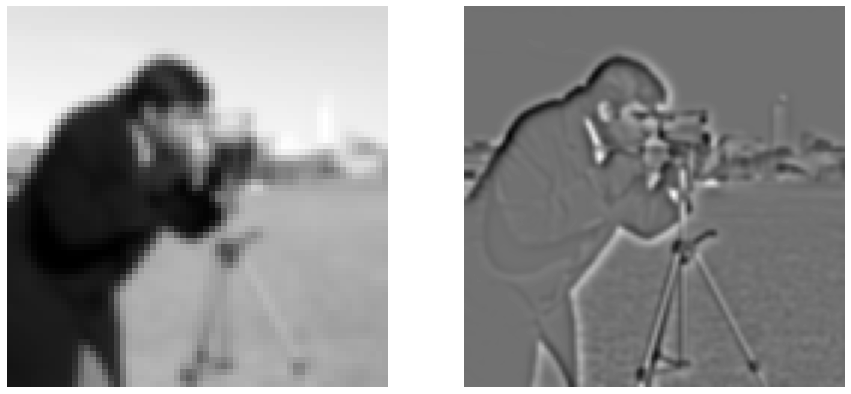

In [4]:
from scipy import ndimage

reduce_filter = 1/16*np.array([1,4,6,4,1])

image = data.camera()

N = 4
gaussian_pyramid = []
gaussian_pyramid.append((image - image.mean()) / image.std())

for step in range(N-1):
    print(gaussian_pyramid[step].shape)
    image = cv2.GaussianBlur(gaussian_pyramid[step],(5,5),0)
    image = ndimage.convolve1d(image, reduce_filter, axis=0)
    gaussian_pyramid.append(ndimage.convolve1d(image, reduce_filter, axis=1)[::2,::2])
    
    display_images(gaussian_pyramid[step+1], 
                   gaussian_pyramid[step] - cv2.resize(gaussian_pyramid[step+1], dsize=gaussian_pyramid[step].shape))

# 2/ Expansion

http://persci.mit.edu/pub_pdfs/pyramid83.pdf Original paper

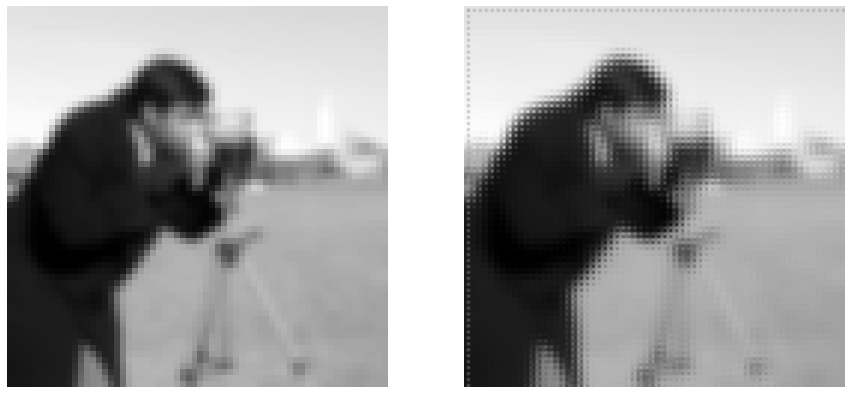

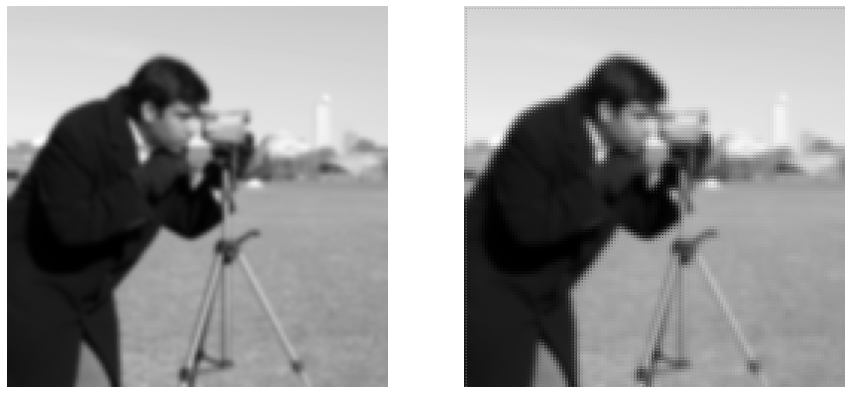

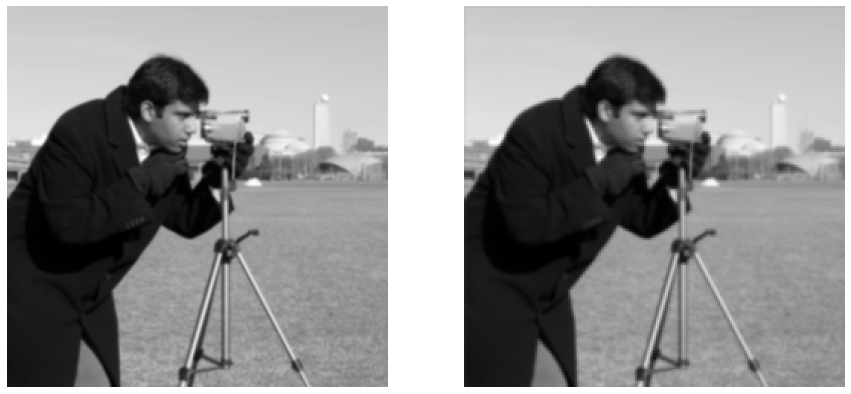

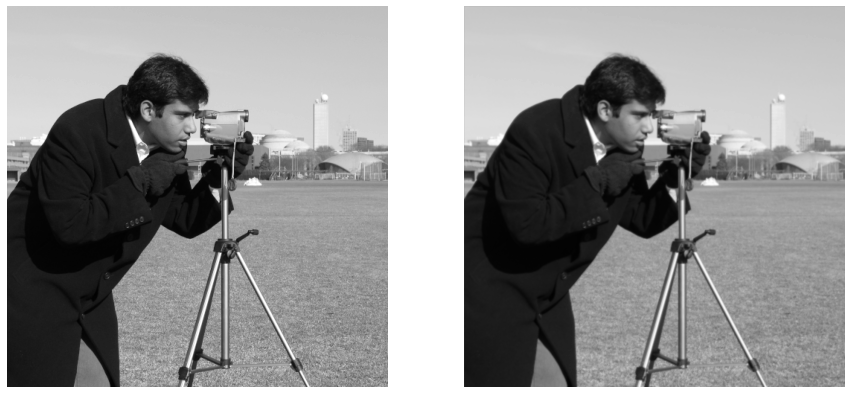

In [6]:
from scipy import signal

expand_filter = 1/8*np.array([1,6,1])
expand_holes = 1/4*np.ones((2,2))

for image in gaussian_pyramid[::-1]:
    h,w = image.shape
    expanded = np.zeros((h*2,w*2))
    odds = ndimage.convolve1d(image, expand_filter, axis=0)
    odds = ndimage.convolve1d(odds, expand_filter, axis=1)
    expanded[::2,::2] = odds
    expanded[::2,1::2] = ndimage.convolve1d(image, 1/2*np.array([1,1]), axis=0)
    expanded[1::2,::2] = ndimage.convolve1d(image, 1/2*np.array([1,1]), axis=1)
    expanded[1::2,1::2] = signal.convolve2d(image, expand_holes, mode="same")
    #evens = ndimage.convolve1d(image, 1/2*np.array([1,1]), axis=0)
    #evens = ndimage.convolve1d(evens, 1/2*np.array([1,1]), axis=1)
    #expanded[1::2,1::2] = evens
    display_images(image,expanded)